Pre: Import libraries and necessary packages 

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings("ignore")

Import dataframes created during Munging 

In [3]:
actors_df = pd.read_csv('/Users/spence/Documents/GitHub/Movie Recommender System/Saved Datasets/movie_actors.csv', index_col=0)
directors_df = pd.read_csv('/Users/spence/Documents/GitHub/Movie Recommender System/Saved Datasets/movie_directors.csv', index_col=0)
genres_df = pd.read_csv('/Users/spence/Documents/GitHub/Movie Recommender System/Saved Datasets/movie_genres.csv', index_col=0)
num_stats_df = pd.read_csv('/Users/spence/Documents/GitHub/Movie Recommender System/Saved Datasets/movie_ints.csv', index_col=0)
nat_lang_df = pd.read_csv('/Users/spence/Documents/GitHub/Movie Recommender System/Saved Datasets/movie_nat_lang.csv', index_col=0)
prod_comp_df = pd.read_csv('/Users/spence/Documents/GitHub/Movie Recommender System/Saved Datasets/movie_prodcomp.csv', index_col=0)
rel_year_df = pd.read_csv('/Users/spence/Documents/GitHub/Movie Recommender System/Saved Datasets/release_year.csv', index_col=0)
tags_df = pd.read_csv('/Users/spence/Documents/GitHub/Movie Recommender System/Saved Datasets/movie_tags.csv', index_col=0)

In [4]:
#import full set, in case a refernce is handy
full_df = pd.read_csv('/Users/spence/Documents/GitHub/Movie Recommender System/Saved Datasets/movie_cats.csv', index_col=0)

# Pt. 1 Examining numerical data

The 'num_stats_df' consists of movie metrics that are natively numerircal. Lets take a look..

In [5]:
num_stats_df.drop(['title', 'id'], axis=1, inplace=True)
num_stats_df.head(3)

,runtime,budget,revenue,vote_average,vote_count,popularity
0,81.0,30000000,373554033,7.7,5415,21.946943
1,104.0,65000000,262797249,6.9,2413,17.015539
2,101.0,0,0,6.5,92,11.712900


In [6]:
# allows me to see the amount of missing values for a particular instance(row)
(num_stats_df.loc[2] == 0).sum() 
# allows me to see the amount of missing values for all rows
(num_stats_df == 0).sum(axis=1)

0        0
1        0
2        2
3        0
4        1
        ..
46619    2
46620    2
46621    2
46622    4
46623    4
Length: 44984, dtype: int64

In [7]:
num_stats_df[num_stats_df['runtime'] == 0.0]
num_stats_df[num_stats_df['budget'] == 0.0]
num_stats_df[num_stats_df['revenue'] == 0.0]
num_stats_df[num_stats_df['vote_average'] < 0.1]
num_stats_df[num_stats_df['vote_count'] == 0.0]
num_stats_df[num_stats_df['popularity'] < 1]


,runtime,budget,revenue,vote_average,vote_count,popularity
32,50.0,0,0,6.8,4,0.745542
36,51.0,0,0,3.5,2,0.114469
39,106.0,0,676525,6.7,13,0.894647
50,93.0,0,0,6.3,3,0.595949
55,89.0,0,0,3.0,1,0.307075
...,...,...,...,...,...,...
46619,90.0,0,0,4.0,1,0.072051
46620,360.0,0,0,9.0,3,0.178241
46621,90.0,0,0,3.8,6,0.903007
46622,87.0,0,0,0.0,0,0.003503


All films have a value for 'runtime' ... We imputed the average runtime for ~1500 films during wrangling. 

36,129 films have '0' as the value for 'budget'. That's  ~80%  of films have '0' for budget value, which we will assume is missing data.

37,599 films have '0' as the value for 'revenue'. That's  ~83%  of films have '0' for revenue value, which we will assume is missing data.

2,928 films have '0' for the 'vote_average' - 'vote_average' is the average score from user ratings on TMDB. Only ~6% of films lack this data.

2,839 movies have '0' for 'vote_count' - 'vote_count' is the amount of  TMDB users who have scored a movie. Only ~6% of films lack this data.

64 films have no popularity score at all.   ~20,000 films have a popularity score less than 1.   ~24,000 have a popularity score greater than or equal to 1. 


# Part 2: Visually examining numerical data

<AxesSubplot:>

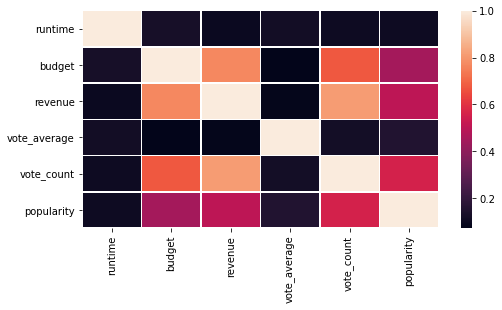

In [8]:
# heatmap showing possible correlations between numerical features 

fig, ax = plt.subplots(figsize=(8,4))
corr = num_stats_df.corr()
sns.heatmap(corr, linewidths=.5, ax=ax)

Some clear correlations we can see here: 'Revenue' and 'budget' are positively correlated... and both are also positively correlated with 'vote count' and 'popularity'. 

This makes sense. With a higher budget there's higher potential for revenue. Also the more people that scored a movie, the more 'popular' it is. 

What is interesting here is that there doesn't appear to be a positive correlation between 'popularity' and 'vote average'. 'Vote average' is the average score/rating of a film, whereas 'popularity' is a more complicated metric. According to the TMDB website, 'popularity' takes into account the amount of people who've searched the film, the number of votes it's received, the amount of viewers who've added it to their watchlist, etc.. So popularity doesn't necessarily correlate to a postive rating, it just means 'hype' (good or bad). 

It does make sense that 'revenue' and 'popularity' are positively correlated. A high grossing film is likely to generate more buzz and thus ranking higher in 'popularity'. 

Let use some boxplots to spot outliers in our numerical data

<AxesSubplot:xlabel='runtime'>

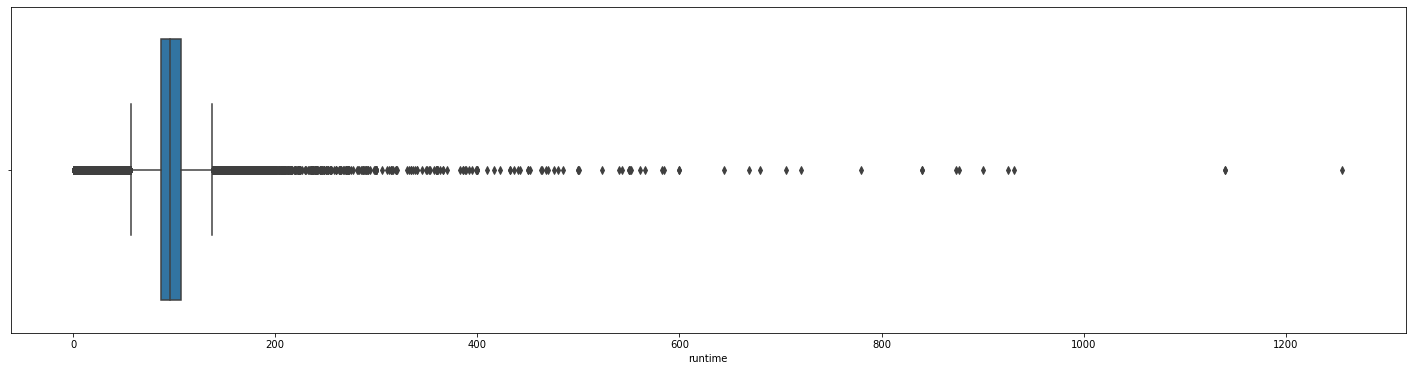

In [9]:
# boxplot for runtime 

fig, ax = plt.subplots(figsize=(25,6))
sns.boxplot(num_stats_df.runtime)

In [10]:
num_stats_df.runtime.mean()

97.53048244599196

Our median runtime is 96 mins and our mean runtime is 97.5 mins. The fact that they're close shows that the mean isn't being pulled too far to either extreme. There are a few vey high value outliers with values over 1000 mins. 

In [11]:
num_stats_df[num_stats_df['runtime'] > 1000]

,runtime,budget,revenue,vote_average,vote_count,popularity
20167,1140.0,0,0,5.7,3,1.507756
24379,1256.0,0,0,7.9,8,0.664727
42100,1140.0,0,0,8.5,4,0.145073


Afte some investigation we learned that the outliers are TV series films, hence the extremely long runtime. 

<AxesSubplot:xlabel='budget'>

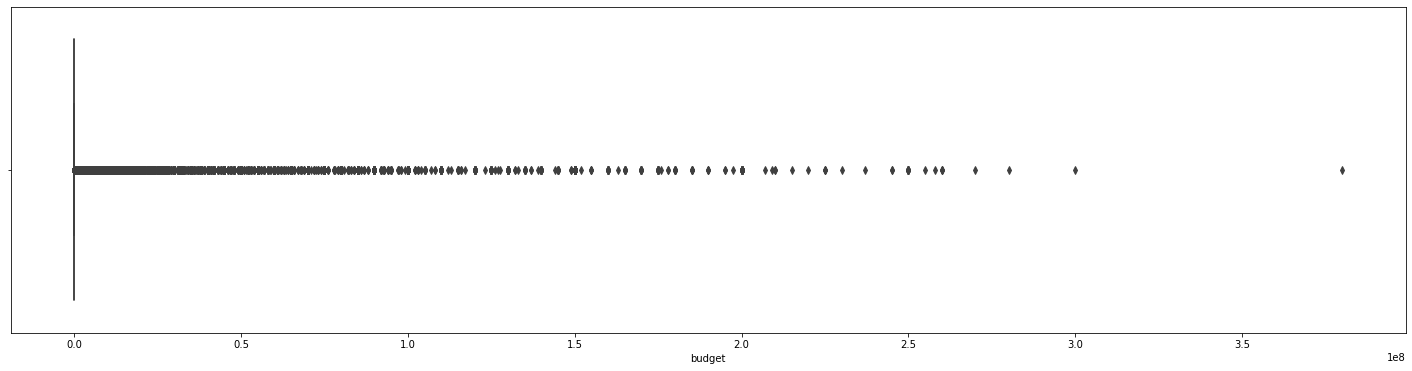

In [12]:
# boxplot for budget

fig, ax = plt.subplots(figsize=(25,6))
sns.boxplot(num_stats_df.budget)

<AxesSubplot:xlabel='revenue'>

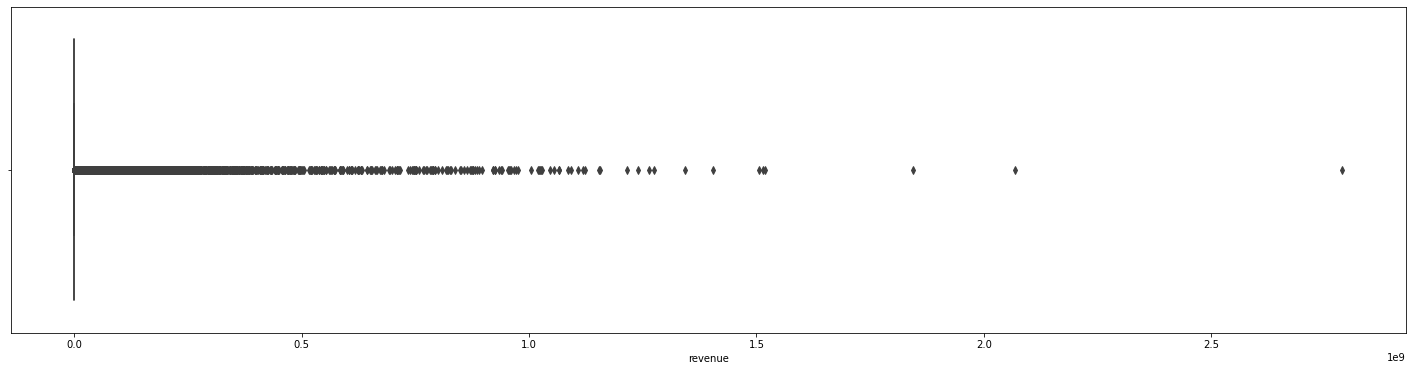

In [13]:
# boxplot for revenue

fig, ax = plt.subplots(figsize=(25,6))
sns.boxplot(num_stats_df.revenue)

The box plots for 'budget' and 'revenue' have very similar distributions. Keeping in mind that we are missing data for ~80% of films for these two features. 

<AxesSubplot:xlabel='budget', ylabel='revenue'>

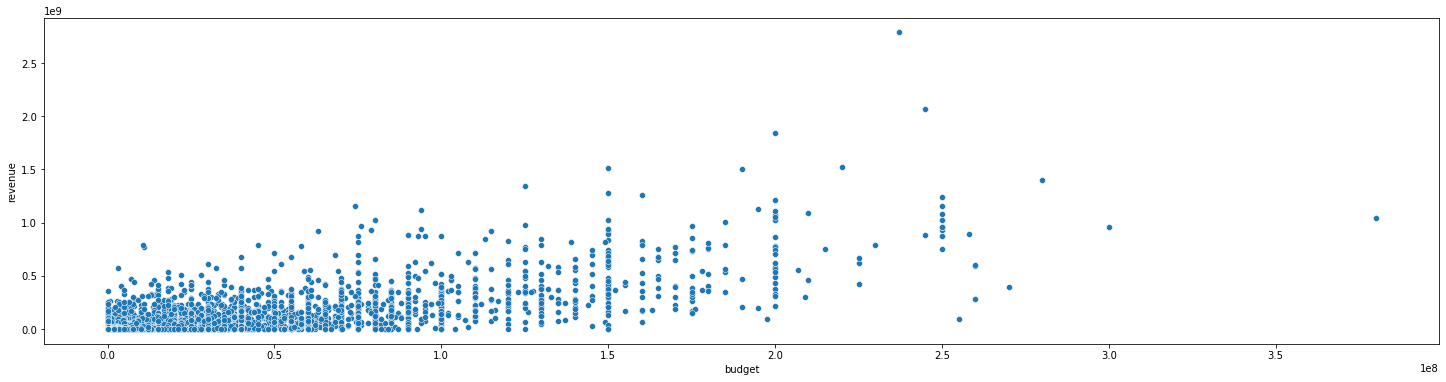

In [14]:
# scatter plot for the correlation between budget - revenue 

fig, ax = plt.subplots(figsize=(25,6))
sns.scatterplot(x='budget',y='revenue',data=num_stats_df)

We can see from the scatter plot above that with a higher budget we get a higher revenue. 

<AxesSubplot:xlabel='vote_average'>

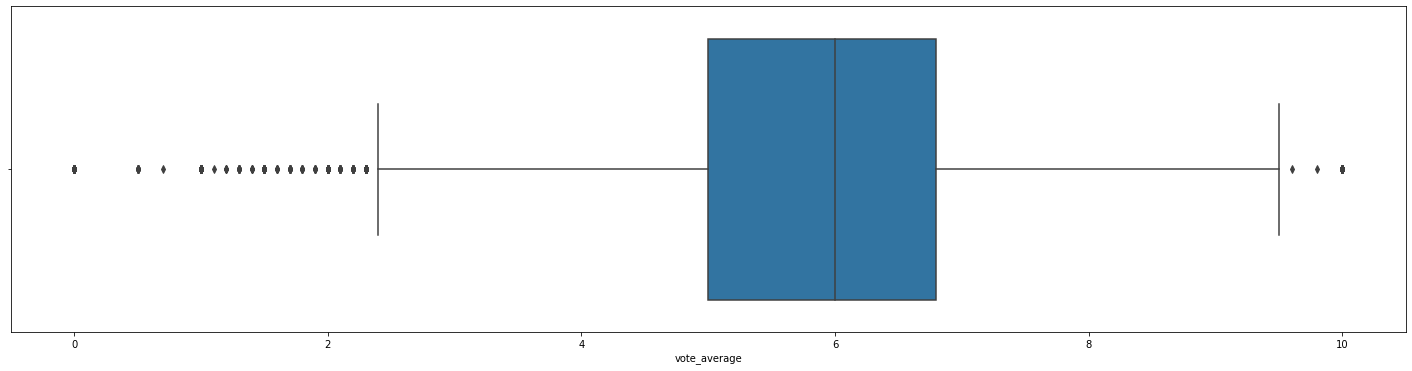

In [15]:
# boxplot for vote_average

fig, ax = plt.subplots(figsize=(25,6))
sns.boxplot(num_stats_df.vote_average)

In [16]:
# getting a count of films with a 'vote_average' in the interquartile range

num_stats_df[(num_stats_df['vote_average'] > 5) & (num_stats_df['vote_average'] < 7)] 

,runtime,budget,revenue,vote_average,vote_count,popularity
1,104.0,65000000,262797249,6.9,2413,17.015539
2,101.0,0,0,6.5,92,11.712900
3,127.0,16000000,81452156,6.1,34,3.859495
4,106.0,0,76578911,5.7,173,8.387519
6,127.0,58000000,0,6.2,141,6.677277
...,...,...,...,...,...,...
46609,2.0,0,0,6.5,6,0.225432
46611,146.0,0,0,6.6,14,1.559596
46613,90.0,0,0,6.0,3,0.225051
46614,65.0,0,0,6.3,8,0.222814


In [17]:
num_stats_df.vote_average.mean()

5.623986306241928

The vote average median is 6 and the mean is 5.6, most of the data looks clustered near the mean --  ~23K films have a vote average in the interquartile range 

<AxesSubplot:xlabel='vote_count'>

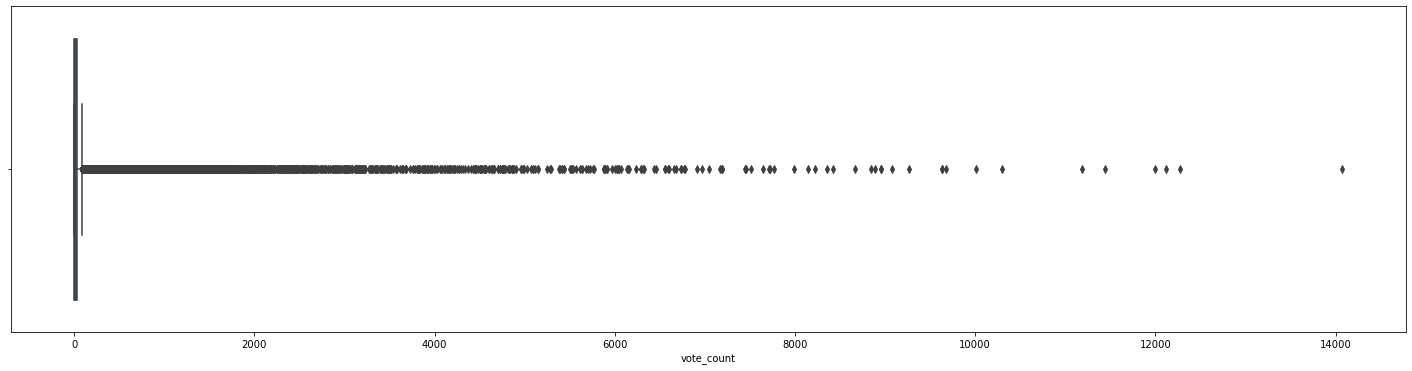

In [18]:
# boxplot for vote_count

fig, ax = plt.subplots(figsize=(25,6))
sns.boxplot(num_stats_df.vote_count)

In [19]:
num_stats_df.vote_count.mean() # 110.9
num_stats_df.vote_count.median() #10
num_stats_df.vote_count.mode() #1

0    1
dtype: int64

The middle value of 'vote_count' is 10. The average is 110 which suggests there are some high outliers, which we can confirm looking at the box plot above. 

<AxesSubplot:xlabel='vote_average', ylabel='vote_count'>

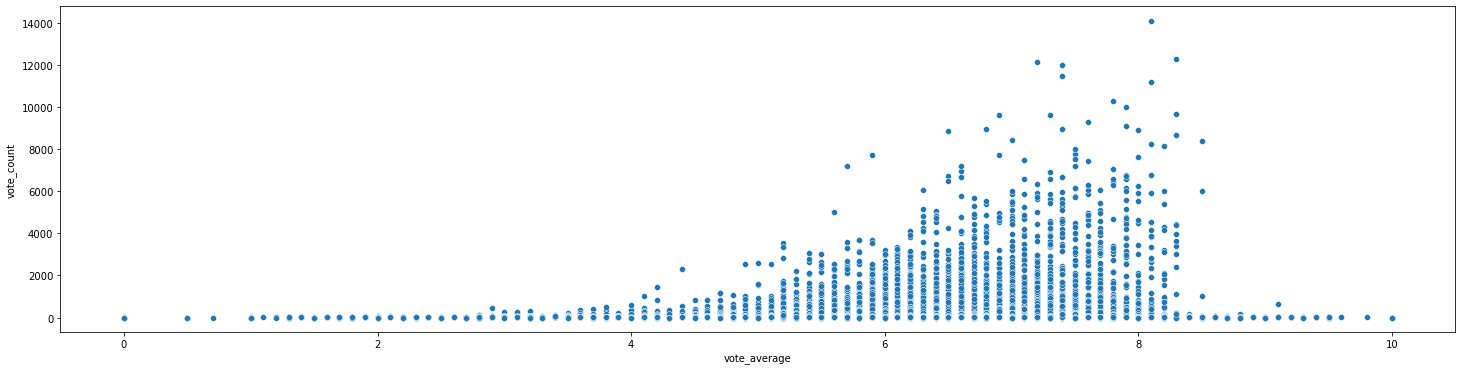

In [20]:
plt.subplots(figsize=(25,6))
sns.scatterplot(x='vote_average',y='vote_count',data=num_stats_df)

Based on the scatter plot above there seems to be a postivie correlation between 'vote_count' and 'vote_average', up to a point. 

<AxesSubplot:xlabel='popularity'>

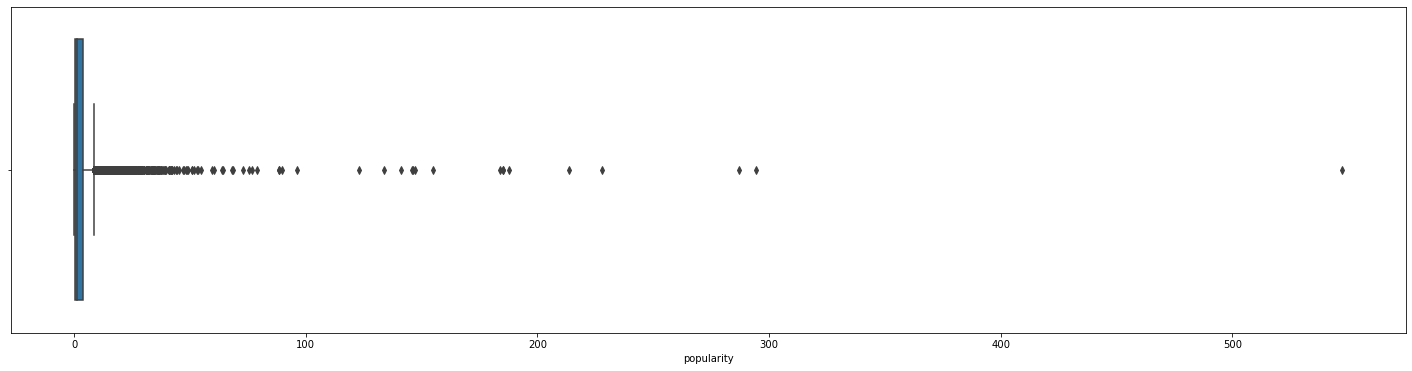

In [21]:
# boxplot for popularity

fig, ax = plt.subplots(figsize=(25,6))
sns.boxplot(num_stats_df.popularity)

In [22]:
num_stats_df.popularity.mode() # 0
num_stats_df.popularity.median() # 1.13
num_stats_df.popularity.describe() 

count    44984.000000
mean         2.938830
std          6.024757
min          0.000000
25%          0.390901
50%          1.135506
75%          3.728583
max        547.488298
Name: popularity, dtype: float64

In [23]:
num_stats_df[num_stats_df['popularity'] > 500]

,runtime,budget,revenue,vote_average,vote_count,popularity
30908,91.0,74000000,1156730962,6.4,4729,547.488298


The mean of the 'popularity' feature is being pulled up by some outliers, but one in particular, due to the film 'Minions' having an insanely high score of 547. 

<AxesSubplot:xlabel='vote_average', ylabel='popularity'>

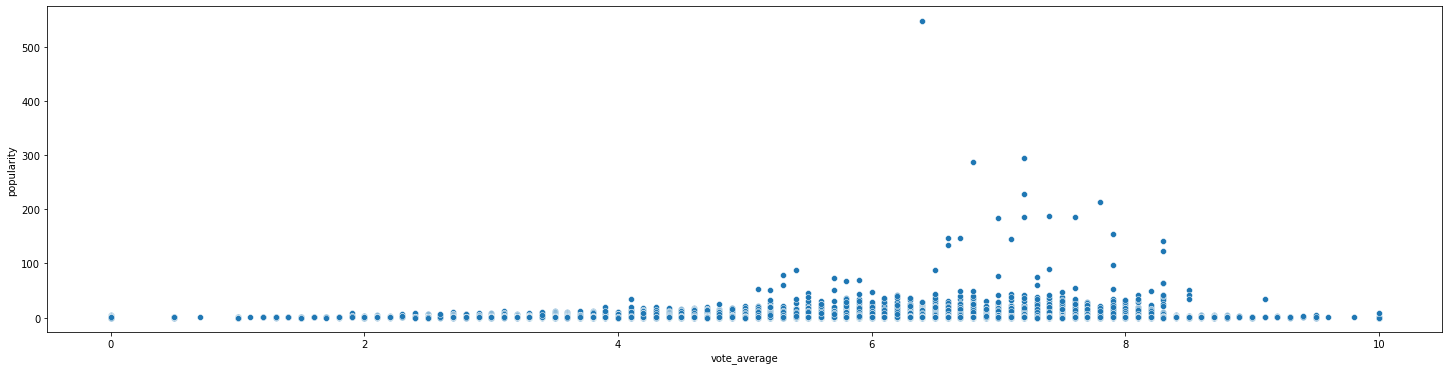

In [24]:
plt.subplots(figsize=(25,6))
sns.scatterplot(x='vote_average',y='popularity',data=num_stats_df)

Theres seems to be a slight correlation between 'popularity' and 'vote_average'. For films in the interquartile vote-average range, the popularity scores do move higher. 

coeff_var = 0.35 , mean = 97.53048244599196 , std = 34.02915450714268


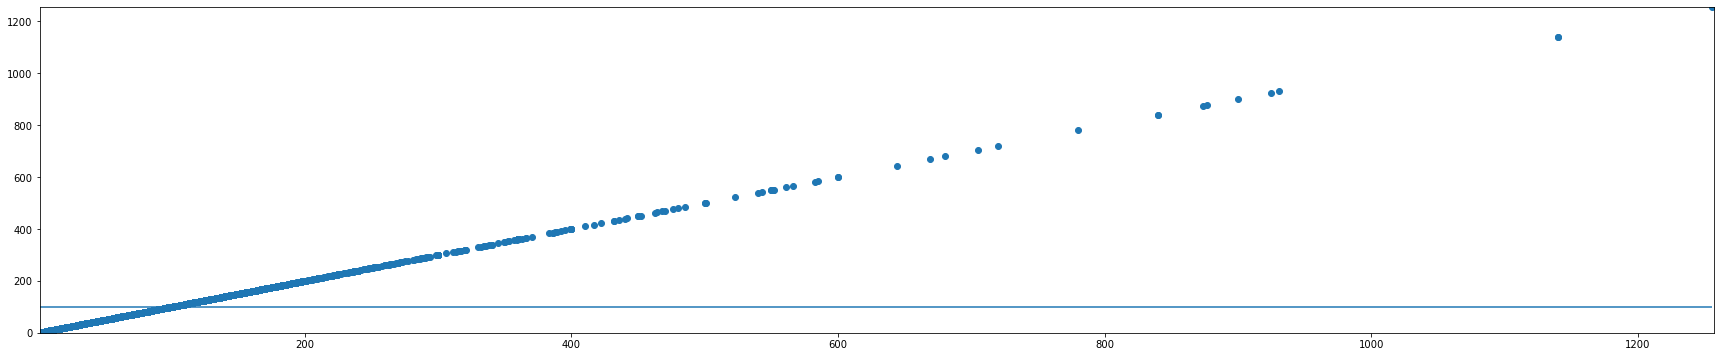

In [25]:
data = num_stats_df['runtime']
mean = data.mean()
std = data.std()
coeff_var = std / mean
min_value = min(data)
max_value = max(data)
print('coeff_var =', round(coeff_var,2), ', mean =', mean, ', std =', std)

plt.subplots(figsize=(30,6))
plt.ylim(min_value-1, max_value+1)
plt.xlim(min_value, max_value+1)
plt.scatter(x=data, y=data)
plt.hlines(y=mean, xmin=0, xmax=max_value)
plt.show()

Let's take a look at the coefficient of variation for each feature

In [26]:
cv = lambda x: np.std(x, ddof=1) / np.mean(x) * 100 
num_stats_df.apply(cv)

runtime          34.890789
budget          410.523629
revenue         571.079053
vote_average     34.064432
vote_count      445.131861
popularity      205.005311
dtype: float64

Based on our coefficient values, we see that the 'runtime' and 'vote_averag' features are more clustered around the mean meaning there's less variability in the data. 

Whereas 'budget', 'revenue', 'vote_count' and 'popularity' all have high variability. 

# Part 3: Examining categorical data

In [27]:
# drop 'id' and 'title' columns from each one, but first create data set with just 'id' and 'title'  for future reference 
title_id_df = genres_df[['id', 'title']]

actors_df.drop(['id', 'title'], axis=1, inplace=True)
directors_df.drop(['id'], axis=1, inplace=True)
genres_df.drop(['id', 'title'], axis=1, inplace=True)
nat_lang_df.drop(['id', 'title'], axis=1, inplace=True)
prod_comp_df.drop(['id', 'title'], axis=1, inplace=True)
tags_df.drop(['id', 'title'], axis=1, inplace=True)
rel_year_df.drop(['id'], axis=1, inplace=True)

In [28]:
actors_df.shape, directors_df.shape, genres_df.shape, nat_lang_df.shape, prod_comp_df.shape, tags_df.shape, rel_year_df.shape

((44984, 100),
 (44984, 100),
 (44984, 20),
 (44984, 5),
 (44984, 14),
 (44984, 100),
 (44984, 11))

In [29]:
# genres count 
genres_df.sum(axis=0).sort_values(ascending=False)


Drama              20058
Comedy             13073
Thriller            7566
Romance             6663
Action              6542
Horror              4634
Crime               4283
Documentary         3872
Adventure           3468
Science Fiction     3013
Family              2740
Mystery             2453
Fantasy             2290
Animation           1912
Music               1587
Foreign             1586
History             1391
War                 1317
Western             1038
TV Movie             758
dtype: int64

In [30]:
# tags/keywords value counts    

tags_df.sum(axis=0).sort_values(ascending=False).head(50)

woman director          3011
independent film        1894
murder                  1279
based on novel           815
musical                  718
sex                      677
violence                 646
nudity                   628
revenge                  616
biography                608
suspense                 575
love                     560
female nudity            554
sport                    528
police                   450
duringcreditsstinger     440
teenager                 432
sequel                   428
friendship               404
world war ii             390
drug                     358
stand-up comedy          347
prison                   346
high school              313
martial arts             310
suicide                  306
rape                     303
film noir                301
silent film              301
kidnapping               299
family                   289
serial killer            288
monster                  277
alien                    274
dystopia      

In [31]:
# language / nationalilty value counts 

nat_lang_df.sum(axis=0).sort_values(ascending=False)

english_lang     31941
US_film          18293
foreign_film     14146
foreign_lang     13043
international     6970
dtype: int64

In [32]:
# production company value counts 

prod_comp_df.sum(axis=0).sort_values(ascending=False)

Warner Bros.           1026
MGM                     999
Paramount Pictures      996
20th Century Fox        914
Columbia Pictures       867
Universal Pictures      822
Disney                  377
RKO Radio Pictures      290
Canal+                  288
New Line Cinema         276
United Artists          275
BBC Films               224
Touchstone Pictures     176
Pixar                    52
dtype: int64

In [33]:
# release year value counts 

rel_year_df.drop(['release year'], axis=1).sum(axis=0).sort_values(ascending=False).head(50)

2010s       12639
2000s       11112
1990s        5646
1980s        3907
1970s        3442
1960s        2603
1950s        2072
1940s        1487
1930s        1308
Pre_1930      768
dtype: int64

More movies get made incrementally with each decade since the 30's.

<AxesSubplot:xlabel='release year', ylabel='count'>

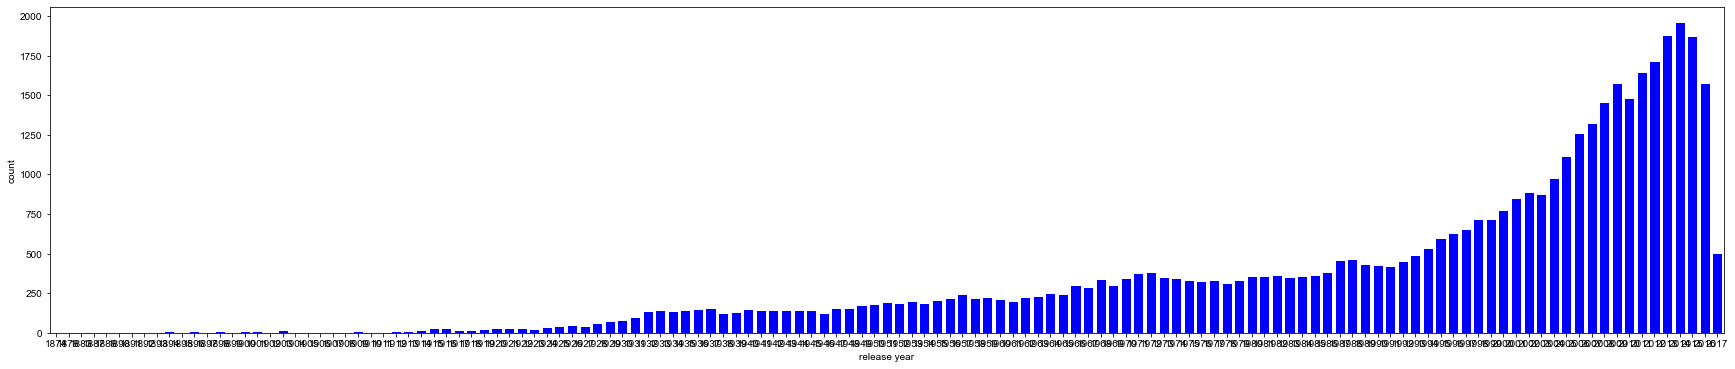

In [34]:
# charting the count of movies per year 

fig, ax = plt.subplots(figsize=(30,6))
sns.set_theme(style="darkgrid")
sns.countplot(x='release year', data=rel_year_df, color='blue', saturation=1, ax=ax)

In [35]:
# directors value counts 

directors_df.sum(axis=0).sort_values(ascending=False).head(50)

John Ford                   66
Michael Curtiz              65
Werner Herzog               54
Alfred Hitchcock            53
Georges Méliès              49
Woody Allen                 49
Sidney Lumet                46
Jean-Luc Godard             46
Charlie Chaplin             44
Raoul Walsh                 43
William A. Wellman          42
Henry Hathaway              41
Richard Thorpe              40
Martin Scorsese             39
Ingmar Bergman              39
George Cukor                38
John Huston                 38
Fritz Lang                  38
Mervyn LeRoy                37
Robert Altman               37
Robert Wise                 36
Joseph Sargent              35
J. Lee Thompson             35
Claude Chabrol              35
Howard Hawks                35
Richard Fleischer           35
Roger Corman                35
Takashi Miike               35
Clint Eastwood              35
Frank Capra                 35
Norman Taurog               34
Buster Keaton               34
Spike Le

In [36]:
# actors value counts 

actors_df.sum(axis=0).sort_values(ascending=False).head(50)

John Wayne              106
Jackie Chan              89
Michael Caine            86
Robert De Niro           84
Gérard Depardieu         82
Christopher Lee          74
Nicolas Cage             71
Bette Davis              68
James Mason              67
Samuel L. Jackson        67
Bruce Willis             64
Susan Sarandon           64
Harvey Keitel            63
Donald Sutherland        63
Gene Hackman             62
Cary Grant               61
Jeff Bridges             61
James Stewart            60
Marcello Mastroianni     59
Robert Mitchum           58
Barbara Stanwyck         58
Henry Fonda              58
Burt Lancaster           57
Catherine Deneuve        57
Kirk Douglas             57
Anthony Quinn            57
Morgan Freeman           56
Eric Roberts             56
Alec Baldwin             55
Paul Newman              55
Helen Mirren             55
Burt Reynolds            55
Christopher Walken       54
Vincent Price            54
Joan Crawford            54
John Cusack         

In [37]:
# merge the categorical df's together 
movie_stats = pd.concat([actors_df, directors_df, genres_df, nat_lang_df, prod_comp_df, tags_df, rel_year_df], join='outer', axis=1, sort=False)

# drop the incidentallly added rows
movie_stats.drop(movie_stats.loc[44984:].index, inplace=True)

In [38]:
movie_stats

,John Wayne,Jackie Chan,Michael Caine,Robert De Niro,Gérard Depardieu,Christopher Lee,Nicolas Cage,Bette Davis,James Mason,Samuel L. Jackson,...,1930s,1940s,1950s,1960s,1970s,1980s,1990s,2000s,2010s,Pre_1930
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44979,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
44980,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
44981,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
44982,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


We've examined our data and are ready for preprocessing. 